# Exercise - Boolean Linear Program

Consider a three-state boolean linear programme

$$
\begin{array}{ll}
\displaystyle \min_{x} &  c^\top x \\ 
\text{s.t. } & Ax \preccurlyeq b,\\
& x_i\in \{0, 0.5, 1\}, \qquad i = 1, \dots, n.
\end{array}\tag{1}
$$

where the variable $x$ is constrained to have components equal to zero, half or one. You can think of $x_i$ as a job we can accept (1), subcontract (0.5) or decline (0), and $−c_i$ as the (positive) revenue we generate if we accept or subcontract job $i$. We can think of $Ax \preccurlyeq b$ as a set of limits on $m$ resources. $A_{ij}$, which is positive, is the amount of resource $i$ consumed if we accept job $j$; If the job is subcontracted we have half the revenues, but we also half the amount of resources spent. $b_i$, which is positive, is the amount of resource $i$ available.

For your convenience, the relaxation of the problem (i.e. $0 \le x\le 1$) is already solved in the code below.

In [ ]:
import cvxpy as cp
import numpy as np

n = 100
m = 300
np.random.seed(1)
A = np.random.random((m, n)) # positve
b = np.dot(A,np.ones(n)/2) # postive
c = -np.random.random(n) # negative, so -c is positive

In [ ]:
# Define and solve the CVXPY problem.
x = cp.Variable(n)
prob = cp.Problem(cp.Minimize(c.T@x),[A @ x <= b, x >= 0, x<= 1])
prob.solve()

# Print result.
L=prob.value
print("\nThe optimal value is", prob.value)
#print("A solution x is", x.value)


The optimal value is -34.589711316657315


1.   Explain how you would develop a threshold rounding for this problem.
2.   Carry out threshold rounding. For each value of of the threshold(s), note the objective value $c^\top \hat{x}$ and the maximum constraint violation $\max_i(A\hat{x} − b)_i$. 
3.   Find the minimum feasible objective value and note it as the upper bound $U$. Compute the relative suboptimality percentage as $\frac{|U-L|}{|L|} \times 100$.

## Solution

1- I would create a meshgrid of t1, and t2, where both t1 and t2 range between 0 and 1 and take 100 unique values each, hence the meshgrid has 10000 element.s
Round x <t1 to 0, t1<=x<=t2 to 0.5, and t2<x to 1
I then calculate the cost and constraint vialation for each, and pick the threshold that with the lowest cost that satisfies the constraint
- Below I used for loops for t1 and t2 rather than creating a meshgrid, but its practically the same

In [ ]:
X = x.value
cost_array = np.zeros((n,n))
cost_array_non_violated = np.zeros((n,n))
cost_array_violated = np.zeros((n,n))
const_violation = np.zeros((n,n))

for i in range(n):
  t1 = i/n
  for k in range(n):
    t2 = k/n

    x_temp = X.copy()

    arr1 = np.where(X<=t1)
    arr2 = np.where((X>t1) & (X<t2))
    arr3 = np.where(X>=t2)
    
    x_temp[arr1] = 0
    x_temp[arr2] = 0.5
    x_temp[arr3] = 1
    
    const_violation[i][k] = np.max(np.matmul(A,x_temp) -b)
    cost_array[i][k] = np.matmul(c.T,x_temp)

    if(np.max(np.matmul(A,x_temp) -b) > 0):
      cost_array_violated[i][k] = np.matmul(c.T,x_temp)
    else:
        cost_array_non_violated[i][k] = np.matmul(c.T,x_temp)
      


In [ ]:
min_valid_cost = cost_array_non_violated.min()
print("Minimum valid cost: ",min_valid_cost)

Minimum valid cost:  -33.94322461620416


In [ ]:
index = np.where(cost_array_non_violated == cost_array_non_violated.min())
index
# Hence multiple points with the same value satisfy the minimum

(array([36, 36, 36, 36, 36, 36, 36]), array([64, 65, 66, 67, 68, 69, 70]))

In [ ]:
const_violation[index]

array([-0.12559138, -0.12559138, -0.12559138, -0.12559138, -0.12559138,
       -0.12559138, -0.12559138])

In [ ]:
# they also have the same constraint violation value as well

so the optimal points are t1 = 0.36, t2=[0.64-0.70]

In [ ]:
sub_opt = np.abs(min_valid_cost - L) / np.abs(L)*100
print("Relative suboptimality percentage is: ",sub_opt)

Relative suboptimality percentage is:  1.8690144434418137


## Exercise 1 - Boolean linear program* (LP)

In a *Boolean linear program* (LP), the variable $x$ is constrained to have components equal to zero or one

$$
\begin{array}{ll}
\displaystyle \min_{x} &  c^\top x \\ 
\text{s.t. } & Ax \preccurlyeq b,\\
& x_i\in \{0, 1\}, \qquad i = 1, \dots, n.\tag{1}
\end{array}
$$

You can think of $x_i$ as a job we either accept or decline, and $−c_i$ as the (positive) revenue we generate if we accept job $i$. We can think of $Ax \preccurlyeq b$ as a set of limits on $m$ resources. $A_{ij}$, which is positive, is the amount of resource $i$ consumed if we accept
job $j$; $b_i$, which is positive, is the amount of resource $i$ available.

In general, such problems are very difficult to solve, even though the feasible set is finite (containing at most $2^n$ points).

A standard approximation method to solve a Boolean LP is the so-called *relaxation*: the constraint that $x_i$ must be zero or one is replaced with the linear inequalities $0 \le x_i \le 1$, namely

$$
\begin{array}{ll}
\displaystyle \min_{x} &  c^\top x \\ 
\text{s.t. } & Ax \preccurlyeq b,\\
& 0 \le x_i \le 1, \qquad i = 1, \dots, n. \tag{2}
\end{array}
$$

We refer to this problem as the *LP relaxation* of the Boolean LP $(1)$. The LP relaxation is far easier to solve than the original Boolean LP.

We call $p_B^*$ the optimal value of $(1)$ associated to the solution $x_B$ and $p_r^*$ the optimal value of $(2)$ associated to the solution $x_r$.

The prolem data is generated by the code below.

In [ ]:
import cvxpy as cp
import numpy as np

n = 100
m = 300
np.random.seed(1)
A = np.random.random((m, n)) # positve
b = np.dot(A,np.ones(n)/2) # postive
c = -np.random.random(n) # negative, so -c is positive

# constraints: x elemts are 0 or 1

X = cp.Variable((n))

objective = cp.Minimize(c.T@X)

constraints = [X >= 0,
               X <= 1,
               A@X <= b]


prob = cp.Problem(objective, constraints)

*   What can you say about the Boolean problem $(1)$ if the relaxation $(2)$ is infeasible?
*   Explain why $p_r^*$ is a lower bound on $p_B^*$.
*   If the solution of the LP relaxation is such that $x_{r,i}\in \{0,1\}$ for all $i$, what can you say in this case?
*   Find a solution in CVXPY of the relaxed problem and examine its entries. Note the associated lower bound as $L = p_r^*$.

- Not sure
- The set of possible x values for Pr includes all the x values for pB, so it should at least produce a cost that is as low as pB.
- If we solve the boolean problem in an iterative way we will get the exact same optimal solution
- The associate dlower bounds are just below 1 and above 0

## Solution 1

In [ ]:
prob.solve(verbose=False)

-34.58971131665731

In [ ]:
print("Optimal var")
print(X.value)
print("minimum x values i", X.value.min())
print("maximum x values i", X.value.max())

Optimal var
[3.60295132e-01 1.00000000e+00 1.00000000e+00 4.49473528e-11
 1.90575989e-10 9.99999999e-01 1.00000000e+00 9.99999999e-01
 7.18064238e-01 1.00000000e+00 1.00000000e+00 2.29510781e-11
 1.00000000e+00 3.55053323e-01 4.70871483e-11 6.85262503e-10
 1.00000000e+00 1.00000000e+00 4.22766073e-11 3.08297135e-11
 5.60941273e-01 1.00000000e+00 4.87349178e-11 1.00000000e+00
 1.04087904e-09 9.17542453e-11 3.56728966e-01 3.17954389e-01
 2.66359164e-11 3.65398259e-01 9.55631966e-11 1.00000000e+00
 9.27644951e-11 1.00000000e+00 1.00000000e+00 3.20753966e-01
 2.11446887e-11 1.00000000e+00 1.00000000e+00 1.32685550e-10
 1.00000000e+00 2.69892732e-01 3.34203561e-10 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 5.38956578e-11
 3.94014073e-11 1.00000000e+00 5.11855266e-11 3.00903181e-11
 1.00000000e+00 1.00000000e+00 2.81022405e-11 2.86511580e-11
 3.34999405e-11 1.00000000e+00 1.00000000e+00 1.00000000e+00
 6.34488659e-01 1.48127731e-01 2.61053444e-11 2.21929899e-11
 1.00000000e

## Exercise 2

This exercise is a follow up to Exercise $1$. We use the same notation and data.

The relaxed solution $x_r$ can be used to guess a Boolean point $\hat x$ by rounding its entries based on a threshold $t \in [0,1]$:

$$
\hat x_i = \left\{ \begin{array}{ll} 1 & x_r \ge t \\ 0 & \text{otherwise} \end{array} \right.
$$

for $i = 1,\dots, n$. If $\hat x$ is feasible for the Boolean problem $(1)$, i.e., if $A\hat x \preccurlyeq b$, then it can be considered a guess at a good point for the Boolean problem. Its objective value, $U = c^\top \hat{x}$, is an upper bound on $p_B^*$. If $U$ and $L$ are close, then $\hat{x}$ is nearly optimal; specifically, $\hat{x}$ cannot be more than
$(U − L)$-suboptimal for the Boolean problem.

Carry out threshold rounding for $100$ values of $t$, uniformly spaced over
$[0, 1]$. 

*    For each value of $t$, note the objective value $c^\top \hat{x}$ and the maximum constraint violation $\max_i(A\hat{x} − b)_i$. Plot the objective value and the maximum violation versus $t$. Be sure to indicate (e.g. with two colours) on the plot the values for which $\hat x$ is feasible, and those for which it is not.
*    Find all values of $t$ for which $\hat{x}$ is feasible and gives minimum objective value, and note the associated upper bound $U$. Give the gap $U − L$ between the upper bound on $p_B^*$ and the lower bound on $p_B^*$. Compute the relative suboptimality percentage as $\frac{|U-L|}{|L|} \times 100$.

In [ ]:
X= X.value

In [ ]:
x = X.copy()
cost_array = np.zeros(n)
const_violation = np.zeros(n)
for i in range(100):
  t = i/100
  x_temp = np.where(x>=t,1,0)
  cost_array[i] = np.matmul(c.T,x_temp)
  const_violation[i] = np.max(np.matmul(A,x_temp) -b)


In [ ]:
feasible = const_violation < 0

In [ ]:
n

100

Text(0.5, 1.0, 'Constraint violation versus threshold')

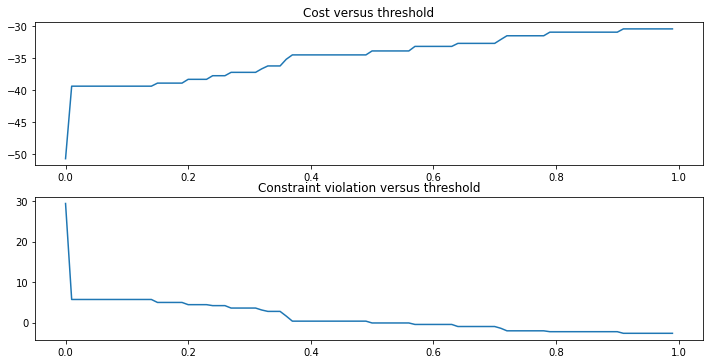

In [ ]:
import matplotlib.pyplot as plt
t = np.linspace(0,0.99,n)
fig,ax = plt.subplots(2,figsize=(10, 5))
fig.tight_layout()

ax[0].plot(t,cost_array, label="Cost")
##ax[0].scatter(t,cost_array, c= feasible,label="Cost")

ax[0].set_title("Cost versus threshold")
ax[1].plot(t,const_violation, label = "Constraint violation ")
ax[1].set_title("Constraint violation versus threshold")


Text(0.5, 1.0, 'Constraint violation versus threshold')

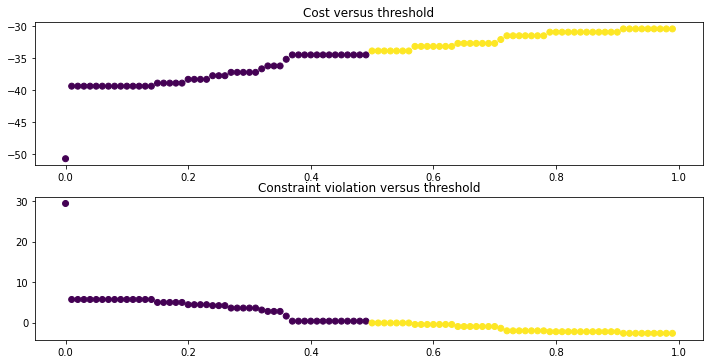

In [ ]:

fig,ax = plt.subplots(2,figsize=(10, 5))
fig.tight_layout()
ax[0].scatter(t,cost_array, c= feasible,label="Cost")
ax[0].set_title("Cost versus threshold")
ax[1].scatter(t,const_violation, c=feasible, label = "Constraint violation ")
ax[1].set_title("Constraint violation versus threshold")

In [ ]:
t_feasible = t[np.where(feasible==True)]
cost_feasible = cost_array[np.where(feasible==True)]
upper_bound = cost_feasible[0]
lower_bound = prob.value
suboptimality_percentage = np.abs(upper_bound - lower_bound) / np.abs(lower_bound) *100

In [ ]:
print("Upper bound:", upper_bound)
print("Lower bound:", lower_bound)
print("Relatively suboptimal percentage:{}% ".format(suboptimality_percentage ) )


Upper bound: -33.88368852196696
Lower bound: -34.58971131665731
Relatively suboptimal percentage:2.04113526194811% 


Relatively suboptimal percentage:2.04113526194811% 
